The columns are describes as per following:

Status of existing checking account, in Deutsche Mark.

Duration in months

Credit history (credits taken, paid back duly, delays, critical accounts)

Purpose of the credit (car, television,...)

Credit amount

Status of savings account/bonds, in Deutsche Mark.

Present employment, in number of years.

Installment rate in percentage of disposable income

Personal status (married, single,...) and sex

Other debtors / guarantors

Present residence since X years

Property (e.g. real estate)

Age in years

Other installment plans (banks, stores)

Housing (rent, own,...)


Number of existing credits at this bank

Job

Number of people being liable to provide maintenance for

Telephone (yes,no)

Foreign worker (yes,no)

In [140]:
# loading pandas, seaborn, matplotlib, numpy, sklearn with labelencoder, train test split aswell as random forest and logistic regression and classification report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

# we use scipy to load the data as it is in arff format
from scipy.io import arff

# chaning so we can se all columns in pandas
pd.set_option('display.max_columns', None)

In [141]:
# load the data and convert it to right format in a pandas dataframe
file = arff.loadarff('/Users/Persaperlanperpersson/Downloads/dataset_31_credit-g.arff')
df = pd.DataFrame(file[0])

# decode the all columns of type object in the df dataframe to utf-8
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.decode('utf-8')
data = df.copy()
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [143]:
# we split the dataset and instantiate our classifier models
X = df.drop('class', axis=1)
y = df['class']
# we create a loop to check if a columns dtype is object and dropping them from x if true
for col in X.columns:
    if X[col].dtype == 'object':
        X = X.drop(col, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rfc = RandomForestClassifier()
lr = LogisticRegression()

# we create pipelines for our models to be able to use them on the unprocessed data
from sklearn.pipeline import Pipeline
rfc_pipeline = Pipeline([('rfc', rfc)])
lr_pipeline = Pipeline([('lr', lr)])

# we train and test the models on our data
rfc_pipeline.fit(X_train, y_train)
lr_pipeline.fit(X_train, y_train)
rfc_pred = rfc_pipeline.predict(X_test)
lr_pred = lr_pipeline.predict(X_test)

# we print the classification report for both models
print('Random Forest Classification Report')
print(classification_report(y_test, rfc_pred))
print('Logistic Regression Classification Report')
print(classification_report(y_test, lr_pred))


Random Forest Classification Report
              precision    recall  f1-score   support

         bad       0.51      0.27      0.36        91
        good       0.74      0.89      0.80       209

    accuracy                           0.70       300
   macro avg       0.62      0.58      0.58       300
weighted avg       0.67      0.70      0.67       300

Logistic Regression Classification Report
              precision    recall  f1-score   support

         bad       0.77      0.11      0.19        91
        good       0.72      0.99      0.83       209

    accuracy                           0.72       300
   macro avg       0.74      0.55      0.51       300
weighted avg       0.73      0.72      0.64       300



/Users/Persaperlanperpersson/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [144]:
# describe our data dataset and show all columns
data.describe(include='all')

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
count,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000
unique,4,NaN,5,10,NaN,5,5,NaN,4,3,NaN,4,NaN,3,3,NaN,4,NaN,2,2,2
top,no checking,NaN,existing paid,radio/tv,NaN,<100,1<=X<4,NaN,male single,none,NaN,car,NaN,none,own,NaN,skilled,NaN,none,yes,good
freq,394,NaN,530,280,NaN,603,339,NaN,548,907,NaN,332,NaN,814,713,NaN,630,NaN,596,963,700
mean,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,NaN,NaN,2.845000,NaN,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN,NaN
std,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,NaN,NaN,1.103718,NaN,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN,NaN
min,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,NaN,NaN,2.000000,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
50%,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,NaN,NaN,3.000000,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
75%,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,NaN,NaN,4.000000,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN,NaN


Some valueable statistics to keep: Mean credit amount 3271 Deutsche Mark, average duration 20 months, average age 35.5

Ideas for insights:
- sum per purpose
    - earnings per purpose(good-bad sum)
- class over age
- class over jobs
- comparative boxplots of good/bad credit between biggest purposes by sum.


Ideas for new features:
- payment per installment (amount/installments)... maybe duration as well?
- specific article againast category mean (row-(purpose*amount)/n)



In [145]:
# Split the datadf into two dataframes, one for each class and describe them
good_df = data[data['class'] == 'good']
bad_df = data[data['class'] == 'bad']
print("Characteristics of the good credit dataframe")
good_df.describe()

Characteristics of the good credit dataframe


,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,19.207143,2985.457143,2.920000,2.842857,36.224286,1.424286,1.155714
std,11.079564,2401.472278,1.128078,1.108373,11.381145,0.584721,0.362844
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1375.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2244.000000,3.000000,3.000000,34.000000,1.000000,1.000000
75%,24.000000,3634.750000,4.000000,4.000000,42.250000,2.000000,1.000000
max,60.000000,15857.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [146]:
print("Characteristics of the bad credit dataframe")
bad_df.describe()

Characteristics of the bad credit dataframe


,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,24.860000,3938.126667,3.096667,2.850000,33.963333,1.366667,1.153333
std,13.282639,3535.818955,1.088395,1.094605,11.222379,0.559702,0.360911
min,6.000000,433.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1352.500000,2.000000,2.000000,25.000000,1.000000,1.000000
50%,24.000000,2574.500000,4.000000,3.000000,31.000000,1.000000,1.000000
75%,36.000000,5141.500000,4.000000,4.000000,40.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,74.000000,4.000000,2.000000


We can note that those customers with bad creditrating has both higher average credit amount, and apply for a longer duration while only taking a slight higher installment commitment. An archetype of this would be to loan as much as possible to as small monthly cost as possible.

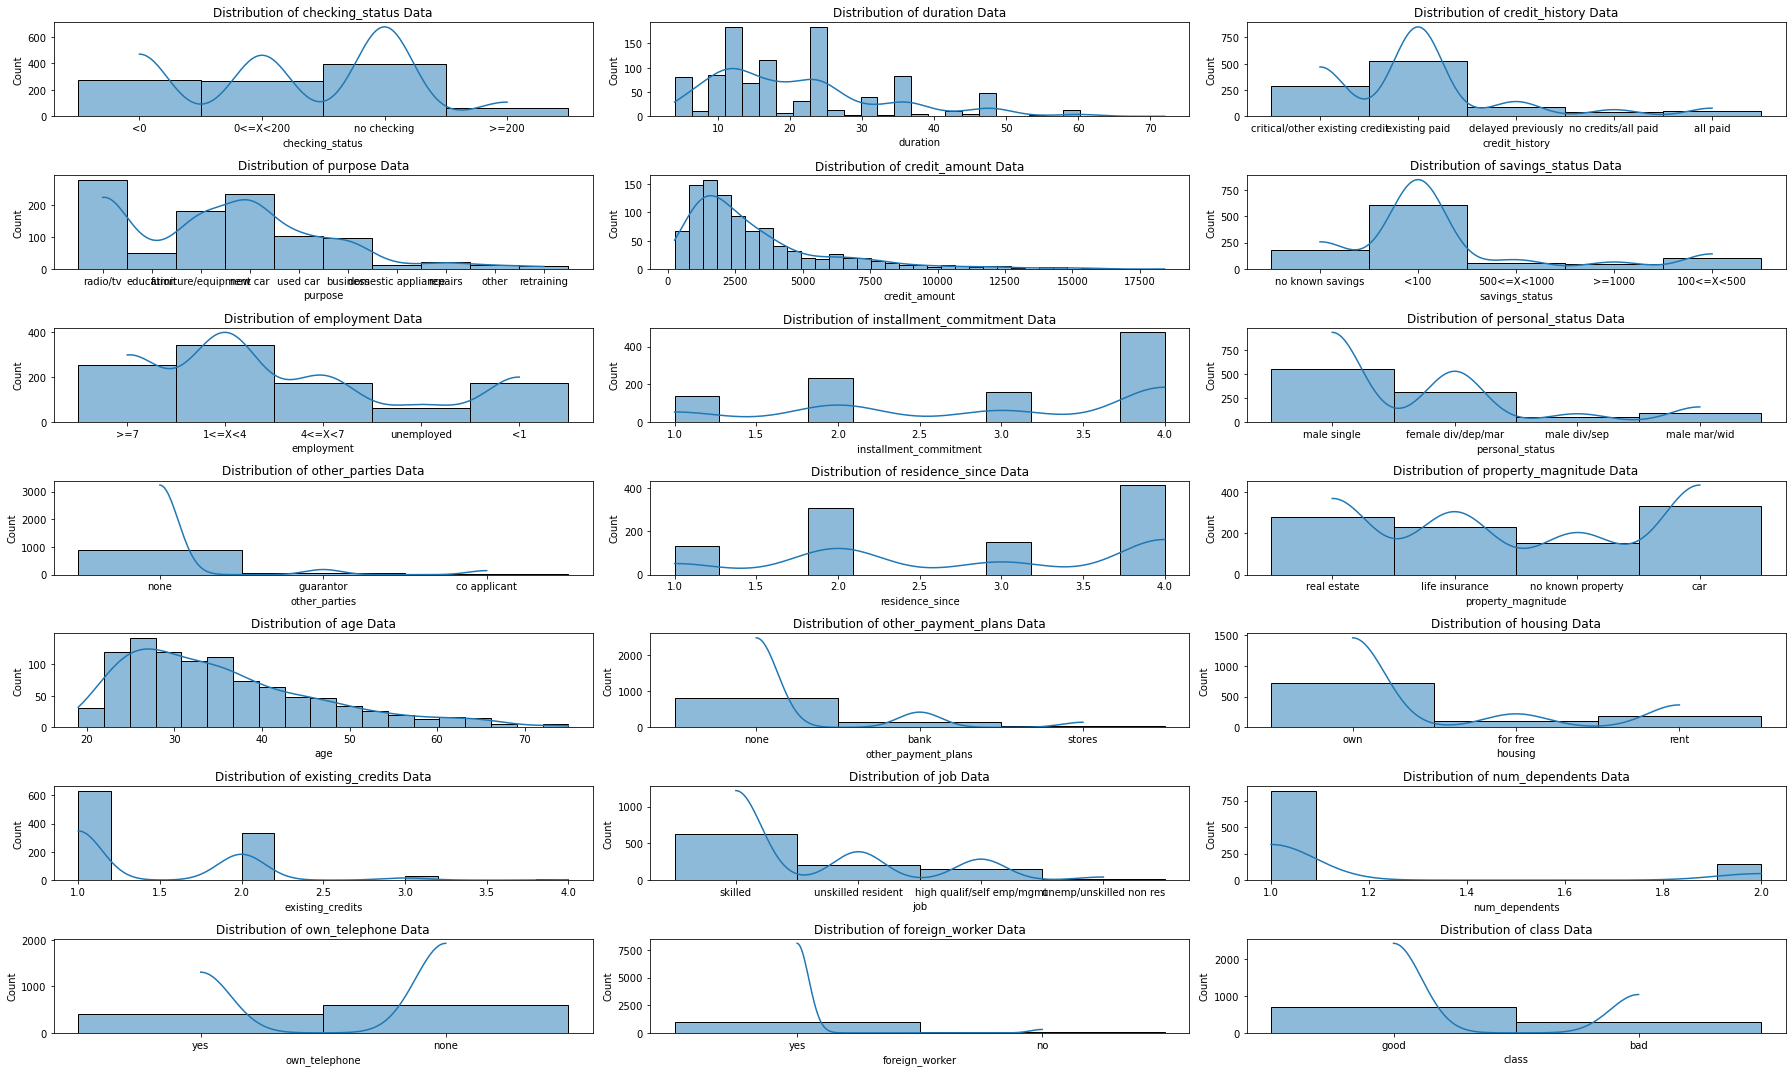

In [147]:
# Plotting a kde histplot for each column in the data dataframe. Using subplot in rows and columns to get a nice overview.
plt.figure(figsize=(25,15))
for i,col in enumerate(data.columns):
    plt.subplot(7 ,3,i+1)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(data[col],kde=True)
    plt.tight_layout()

Text(0.5, 1.0, 'Applied credit for each purpose')

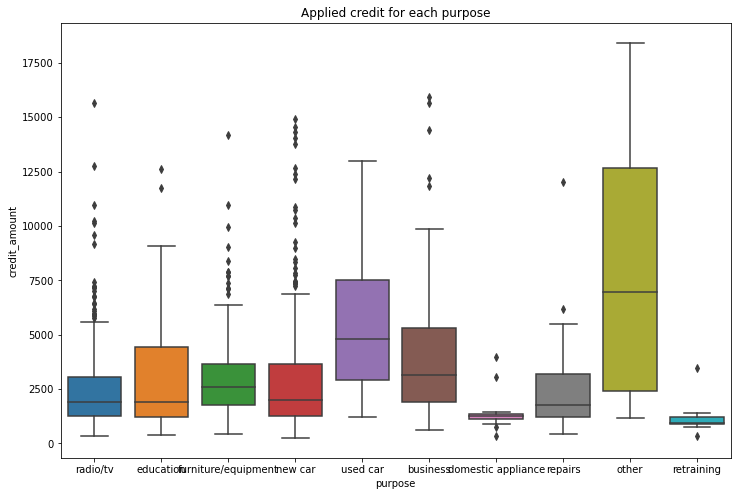

In [148]:
# Make a boxplot for purpose and credit amount
plt.figure(figsize=(12,8))
sns.boxplot(x='purpose',y='credit_amount',data=data)
plt.title("Applied credit for each purpose")


Text(0.5, 1.0, 'Sum of credit amount for each purpose')

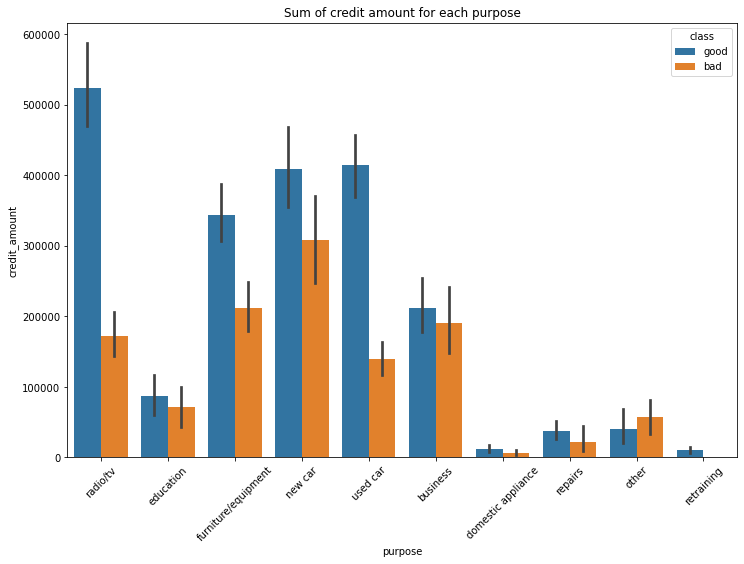

In [149]:
# Compare sum of credit amount for each purpose and class
plt.figure(figsize=(12,8))
sns.barplot(x='purpose',y='credit_amount',hue='class',data=data,estimator=sum)
plt.xticks(rotation=45)
plt.title("Sum of credit amount for each purpose")

Text(0.5, 1.0, 'Average credit amount for each purpose')

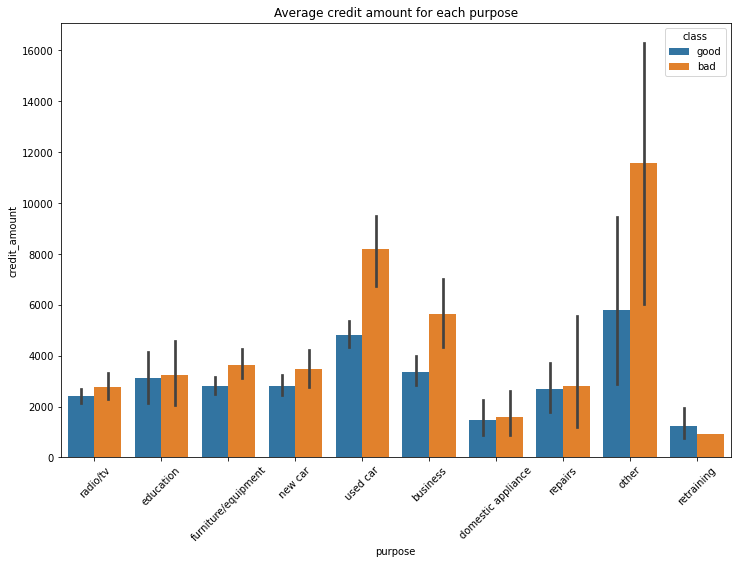

In [150]:
# Compare the averae credit amount per purpose and class
plt.figure(figsize=(12,8))
sns.barplot(x='purpose',y='credit_amount',hue='class',data=data,estimator=np.mean)
plt.xticks(rotation=45)
plt.title("Average credit amount for each purpose")



The picture that begans to appear is that the customers applying for the highest credit are often categorised as bad. They might be risk prone as individuals and now the bank is taking the hit. This is cosistent over all purposes except 'retraining'.

In [151]:
# Calculate how many standard deviations each credit amount is from the mean of that purpose
# and add it as a new column to the dataframe
new_feats['credit_amount_std'] = data.groupby('purpose')['credit_amount'].transform(lambda x: (x - x.mean()) / x.std())

NameError: name 'new_feats' is not defined

In [ ]:
data['checking_status'].value_counts()

no checking    394
<0             274
0<=X<200       269
>=200           63
Name: checking_status, dtype: int64

In [ ]:
# check how many unique entries there are in our categorical columns. This will be determine which will be label or one-hot encoded
data.select_dtypes('object').apply(pd.Series.nunique, axis=0)

checking_status         4
credit_history          5
purpose                10
savings_status          5
employment              5
personal_status         4
other_parties           3
property_magnitude      4
other_payment_plans     3
housing                 3
job                     4
own_telephone           2
foreign_worker          2
class                   2
dtype: int64

for any categorical variable (dtype == object) with 2 unique categories, we will use label encoding, and for any categorical variable with more than 2 unique categories, we will use one-hot encoding.

For label encoding, we use the Scikit-Learn LabelEncoder and for one-hot encoding, the pandas get_dummies(df) function.

In [ ]:
le = LabelEncoder()
le_count = 0

# Iterate over the columns to encode columns
for col in data:
    # check the type
    if data[col].dtype == 'object':
        # Checking amount of unique values
        if len(list(data[col].unique())) <= 2:
            # Not sure exactly what is going on here
            le.fit(data[col])

            data[col] = le.transform(data[col])

            le_count += 1

print("%d columns where were label encoded" % le_count)

3 columns where were label encoded


In [ ]:
data = pd.get_dummies(data)
print("The dataframe has now a shape of", data.shape)

The dataframe has now a shape of (1000, 61)


In [ ]:
# split the data into train and test sets
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(data.drop('class', axis=1), data['class'], test_size=0.2, random_state=42)

In [ ]:
# Train a Random Forest and logistic regression on the training set, test it on the test set and print the classification report
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
lr = LogisticRegression(random_state=42)

rfc.fit(X_train, y_train)
lr.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
lr_pred = lr.predict(X_test)

print('Random Forest Classification Report')
print(classification_report(y_test, rfc_pred))
print('Logistic Regression Classification Report')
print(classification_report(y_test, lr_pred))

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.73      0.46      0.56        59
           1       0.80      0.93      0.86       141

    accuracy                           0.79       200
   macro avg       0.77      0.69      0.71       200
weighted avg       0.78      0.79      0.77       200

Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.63      0.53      0.57        59
           1       0.81      0.87      0.84       141

    accuracy                           0.77       200
   macro avg       0.72      0.70      0.71       200
weighted avg       0.76      0.77      0.76       200



/Users/Persaperlanperpersson/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

